In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm 

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
df= pd.read_csv("monthly-milk-production-pounds.csv")


In [4]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.columns=['Month',"Milk in pounds per cow"]
df.tail()

,Month,Milk in pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [6]:
df.drop(168,axis=0,inplace=True)

In [7]:
df["Month"]=pd.to_datetime(df["Month"])
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [8]:
df.set_index("Month", inplace= True)

In [9]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


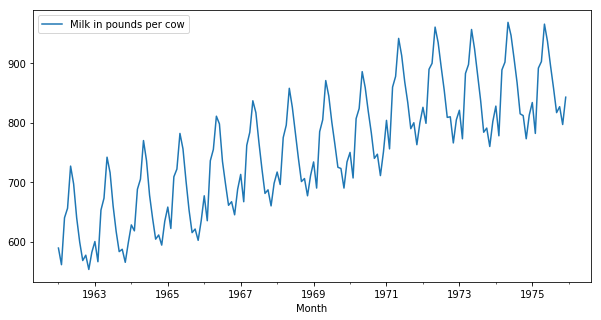

In [11]:
df.plot(figsize=(10,5))

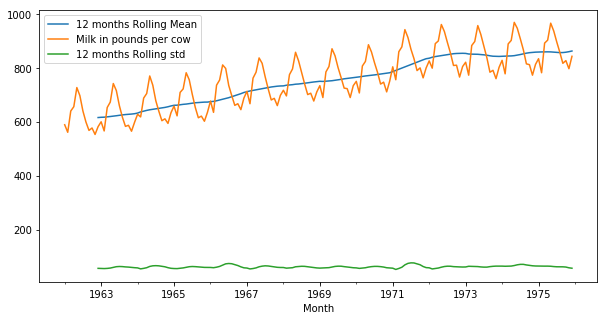

In [12]:
df["Milk in pounds per cow"].rolling(12).mean().plot(label="12 months Rolling Mean")
df["Milk in pounds per cow"].plot(figsize=(10,5))
df["Milk in pounds per cow"].rolling(12).std().plot(label="12 months Rolling std")
plt.legend()

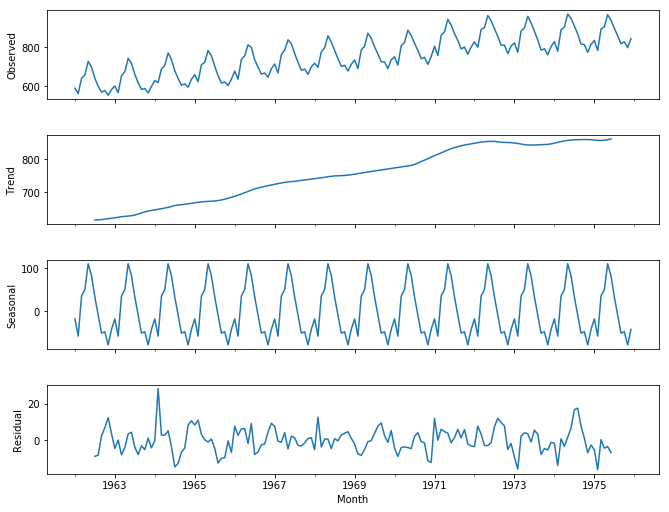

In [13]:
#decompsosition plots ETS 
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df["Milk in pounds per cow"])
d1=decomp.plot()
d1.set_size_inches(10,8)

In [14]:
#Dicky Fullers Test-
#Hypothesis Test - Null Hypothesis is that series is stationnery 
#Small p value - reject null the hypothehis 
#Higher p value - fail to reject the null hypothesis
from statsmodels.tsa.stattools import adfuller 
results=adfuller(df["Milk in pounds per cow"])
#craeating a function for the formating
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augumented Dicky- Fuller Test")
    labels=["ADF Test Statistics","p-value",'# of lags','Num of Observation']
    
    for value, label in zip(result,labels):
        print(label+ " : ",str(value))
    if results[1]<=0.05:
        print("Reject Null Hypothesis")
        print("Data has no unit root and stationery")
    else:
        print("Fail to Reject Null Hypothesis")
        print("Data has unit root and non stationery")
     

In [15]:
adf_check(df["Milk in pounds per cow"])

Augumented Dicky- Fuller Test
ADF Test Statistics :  -1.3038115874221228
p-value :  0.6274267086030347
# of lags :  13
Num of Observation :  154
Fail to Reject Null Hypothesis
Data has unit root and non stationery


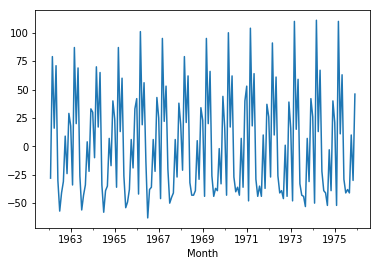

In [19]:
#differencing for stationery data-first difference 
df['First Diff']=df['Milk in pounds per cow']-df['Milk in pounds per cow'].shift(1)
df['First Diff'].plot()


In [23]:
#diff for stationery data- Second difference
adf_check(df['First Diff'].dropna())


Augumented Dicky- Fuller Test
ADF Test Statistics :  -3.054995558653051
p-value :  0.03006800400178724
# of lags :  14
Num of Observation :  152
Fail to Reject Null Hypothesis
Data has unit root and non stationery


Augumented Dicky- Fuller Test
ADF Test Statistics :  -2.3354193143593993
p-value :  0.16079880527711304
# of lags :  12
Num of Observation :  143
Fail to Reject Null Hypothesis
Data has unit root and non stationery


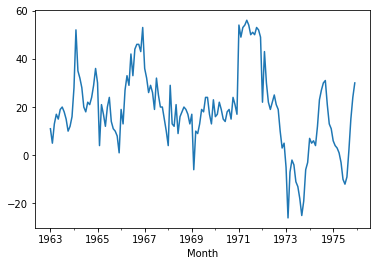

In [28]:
#seasonal Difference 
df["Seasonal_Diff"]=df['Milk in pounds per cow']-df['Milk in pounds per cow'].shift(12)
df['Seasonal_Diff'].plot()
adf_check(df["Seasonal_Diff"].dropna())


In [32]:
#seasonal First Differnce 
df['Seasonal First Diff']=df['First Diff']-df['First Diff'].shift(12)
adf_check(df['Seasonal First Diff'].dropna())

Augumented Dicky- Fuller Test
ADF Test Statistics :  -5.038002274921985
p-value :  1.86542343187882e-05
# of lags :  11
Num of Observation :  143
Fail to Reject Null Hypothesis
Data has unit root and non stationery


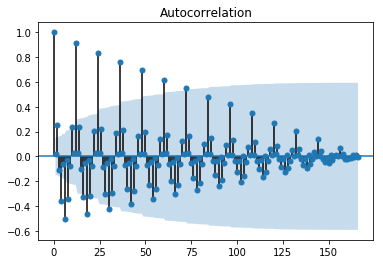

In [36]:
#Auto correlation Plot 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first=plot_acf(df['First Diff'].dropna())


